# 2030 데이터로 Word2Vector사용하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['axes.unicode_minus'] = False

In [9]:
df = pd.read_csv('../2030표심 및 정치성향 분석/data/전처리데이터/data2030_전처리_좋아요가중치_텍스트전처리.csv')
df.head()

Title        Date        ID  \
0  #139​ 민주당 지도부가 2030 마음을 얻으려면...  2021-04-08     샤인디케이   
1  #139​ 민주당 지도부가 2030 마음을 얻으려면...  2021-04-08       문동렬   
2  #139​ 민주당 지도부가 2030 마음을 얻으려면...  2021-04-08  135 swan   
3  #139​ 민주당 지도부가 2030 마음을 얻으려면...  2021-04-08        미루   
4  #139​ 민주당 지도부가 2030 마음을 얻으려면...  2021-04-08       단아란   

                                             Comment Comment_date Channel  \
0          내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.   2021-04-10   박시영TV   
1  2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...   2021-04-10   박시영TV   
2  전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...   2021-04-10   박시영TV   
3  몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...   2021-04-10   박시영TV   
4                                   네 죄송합니다. 삭제하겠습니다   2021-04-10   박시영TV   

     Like  Dislike  Comment_like  \
0  6400.0     83.0          48.0   
1  6400.0     83.0          37.0   
2  6400.0     83.0          34.0   
3  6400.0     83.0          67.0   
4  6400.0     83.0          34.0   

                                    Weighted_comment  \
0  ['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.', ...   
1  ['2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다...   
2  ['전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보...   
3  ['몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단...   
4  ['네 죄송합니다. 삭제하겠습니다', '네 죄송합니다. 삭제하겠습니다', '네 죄송...   

                           Comment_textPreprocessing  
0          내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.  
1  2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다....  
2  전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로...  
3  몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진...  
4                                   네 죄송합니다. 삭제하겠습니다

In [12]:
# 데이터 구조 파악하기
df.shape

(56829, 11)

https://wikidocs.net/book/2155

# 1. Word2Vec
- 각 단어 벡터가 단어 간 유사도를 반영
- '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [10]:
df.columns

Index(['Title', 'Date', 'ID', 'Comment', 'Comment_date', 'Channel', 'Like',
       'Dislike', 'Comment_like', 'Weighted_comment',
       'Comment_textPreprocessing'],
      dtype='object')

In [11]:
df['Comment_textPreprocessing'].shape

(56829,)

In [13]:
# Null값 
df['Comment_textPreprocessing'].isnull().sum()

120

### 1.1 한글 정규 표현식으로 한글 외 문자 제거

In [15]:
def text_clearing(text):
    # 한글 정규식
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    
    # 한글 외의 모든 문자를 길이가 0인 문자열로 변형
    result = hangul.sub('', text)
    
    return result

In [16]:
df['제목댓글'] = df['제목댓글'].apply( lambda x: text_clearing(x))

In [17]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [18]:
# 형태소 정의
okt = Okt()
tokenized_data = []
for sentence in df['제목댓글']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

제목+댓글내용의 최대 길이 : 1266
제목+댓글내용의 평균 길이 : 35.0215000797841


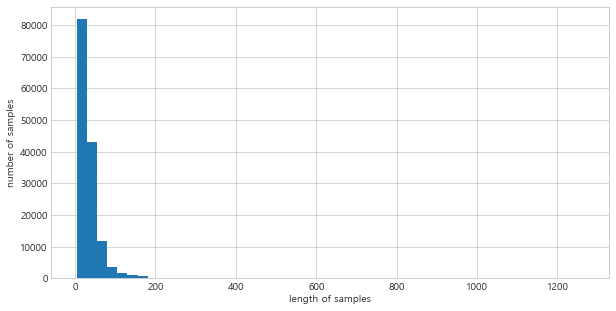

In [19]:
# 제목+댓글내용 길이 분포 확인
print('제목+댓글내용의 최대 길이 :',max(len(l) for l in tokenized_data))
print('제목+댓글내용의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 1.2  Word2Vec 훈련시키기
- (없음)size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [20]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [21]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(21963, 100)

In [22]:
print(model.wv.most_similar("박영선"))

[('오세훈', 0.5764411687850952), ('영선', 0.5106866359710693), ('초조하다', 0.4529839754104614), ('어버버', 0.42676475644111633), ('무선전화', 0.42290782928466797), ('직언', 0.4217921793460846), ('박형준', 0.4149248003959656), ('적합', 0.4129553735256195), ('나경원', 0.4104486405849457), ('이원조', 0.4095178246498108)]


In [23]:
print(model.wv.most_similar("오세훈"))

[('세훈', 0.5848418474197388), ('박영선', 0.5764411687850952), ('초조하다', 0.4346209764480591), ('김영춘', 0.43386954069137573), ('금태섭', 0.4278375506401062), ('유선', 0.4111238718032837), ('내곡동', 0.40984031558036804), ('불꽃', 0.4010070264339447), ('오', 0.3994719684123993), ('유력하다', 0.399166077375412)]


In [24]:
print(model.wv.most_similar("김영춘"))

[('이언주', 0.5599566102027893), ('박형준', 0.5590013861656189), ('대박', 0.5197573304176331), ('정규재', 0.5175073742866516), ('해운대', 0.5071338415145874), ('올인', 0.4768833816051483), ('부산', 0.4567868411540985), ('조강지처', 0.44635123014450073), ('바다이야기', 0.43766355514526367), ('이진복', 0.43741574883461)]


In [25]:
print(model.wv.most_similar("박형준"))

[('김영춘', 0.5590013265609741), ('자갈치', 0.4380435645580292), ('박영선', 0.4149247407913208), ('환조', 0.3987842798233032), ('엠비', 0.39268428087234497), ('무선전화', 0.3913780450820923), ('엘', 0.38856780529022217), ('은희', 0.38589486479759216), ('정규재', 0.38456737995147705), ('부인', 0.38181737065315247)]


### 1.3 모델 저장

In [26]:
from gensim.models import KeyedVectors
# 모델 저장
model.wv.save_word2vec_format('model/word2vec/w2v_TitleComments_0427')

In [1]:
 # 모델 로드
from gensim.models import KeyedVectors
loaded_model = KeyedVectors.load_word2vec_format("./w2v_TitleComments_0427")

In [3]:
model_result = loaded_model.most_similar("민주당",topn=10)
print(model_result)

[('여당', 0.5833343267440796), ('지당', 0.505938708782196), ('정의당', 0.4959515929222107), ('만지다', 0.4899117350578308), ('민주', 0.47781601548194885), ('당', 0.42012691497802734), ('야당', 0.415071040391922), ('여권', 0.4129944443702698), ('보궐', 0.4082983136177063), ('더듬다', 0.40013939142227173)]


In [4]:
model_result = loaded_model.most_similar("국힘",topn=20)
print(model_result)

[('국짐', 0.8264971971511841), ('더민', 0.7123269438743591), ('구김', 0.6722763180732727), ('불민', 0.6586393713951111), ('국집', 0.6302757859230042), ('당대', 0.6089860200881958), ('더추', 0.5967254638671875), ('힘', 0.5951818823814392), ('더듬이', 0.5773580074310303), ('더블', 0.5682083964347839), ('정청', 0.5678206086158752), ('보수당', 0.5645935535430908), ('짐', 0.5555760860443115), ('덜민', 0.543167769908905), ('국똥', 0.5397177934646606), ('지지자', 0.5289016962051392), ('다수', 0.5119171738624573), ('창', 0.5115551948547363), ('홍준표', 0.49535682797431946), ('신돈', 0.4913056492805481)]


In [5]:
loaded_model.most_similar("오세훈",topn=20)

[('세훈', 0.5848418474197388),
 ('박영선', 0.5764411687850952),
 ('초조하다', 0.4346209764480591),
 ('김영춘', 0.43386954069137573),
 ('금태섭', 0.4278375506401062),
 ('유선', 0.4111238718032837),
 ('내곡동', 0.40984031558036804),
 ('불꽃', 0.4010070264339447),
 ('오', 0.3994719684123993),
 ('유력하다', 0.399166077375412),
 ('우위', 0.39101722836494446),
 ('적합', 0.3858765661716461),
 ('상대', 0.38381409645080566),
 ('김진애', 0.3830387592315674),
 ('토론', 0.3821444511413574),
 ('나경원', 0.36653217673301697),
 ('세후니', 0.36534902453422546),
 ('도사', 0.3632289171218872),
 ('영선', 0.3608013689517975),
 ('대결', 0.35436075925827026)]

### 1.4 단어간 거리 확인
- 코사인 유사도를 이용한 단어간 거리 확인

In [6]:
loaded_model.distance('오세훈', '화이팅')

0.8531581610441208

In [7]:
loaded_model.distance('박영선', '화이팅')

0.7453278601169586

In [8]:
loaded_model.distance('오세훈', '망하다')

1.074504368007183

In [9]:
loaded_model.distance('박영선', '망하다')

1.0924549922347069

# Permission denied:
파일 경로가 이상하거나 파일이 아닌 폴더 경로 등을 지정할 경우 오류가 발생한다. 

출처: https://yjs-program.tistory.com/115 [Y초보프로그래머]